In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append('..')
from util import *
from data import read_AAPL, read_engineer_salaries

In [2]:
# Data
import os
data_directory = os.getcwd() + '/../../bin/'
# print(data_directory)
stock_data = read_AAPL(data_directory)
stock_data_select = stock_data[['Date', 'Close']][stock_data.index % 200 == 0]

engineer_salaries = read_engineer_salaries(data_directory)
print(engineer_salaries.head())

   Age  All_Devs  Python  JavaScript
0   18     17784   20046       16446
1   19     16500   17100       16791
2   20     18012   20000       18942
3   21     20628   24744       21780
4   22     25206   30500       25704


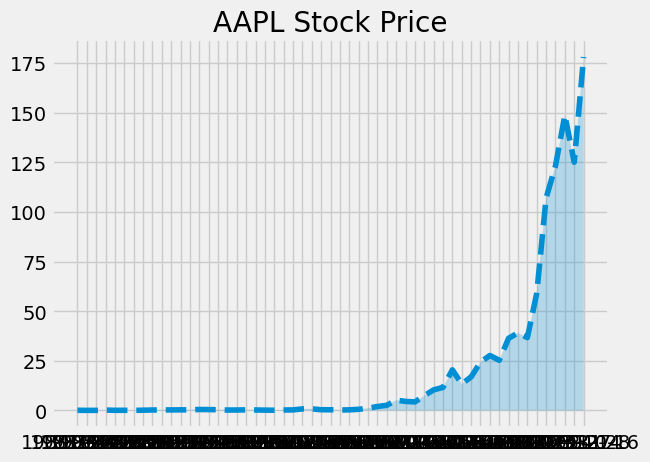

In [7]:
plt.style.use('fivethirtyeight')

plt.title('AAPL Stock Price')
plt.plot(stock_data_select['Date'], stock_data_select['Close'], linestyle = '--')
plt.fill_between(stock_data_select['Date'], stock_data_select['Close'], alpha = 0.25)
plt.show()

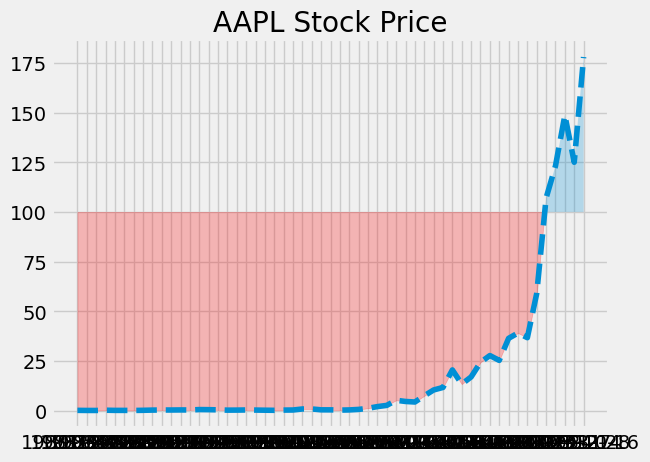

In [12]:
threshold = 100 ### Can also be a list so that the filling will be the difference between two lists.

plt.style.use('fivethirtyeight')

plt.title('AAPL Stock Price')
plt.plot(stock_data_select['Date'], stock_data_select['Close'], linestyle = '--')
plt.fill_between(stock_data_select['Date'], stock_data_select['Close'], threshold, where = (stock_data_select['Close'] > threshold), interpolate = True, alpha = 0.25)
plt.fill_between(stock_data_select['Date'], stock_data_select['Close'], threshold, where = (stock_data_select['Close'] <= threshold), interpolate = True, color = 'red', alpha = 0.25)

plt.show()

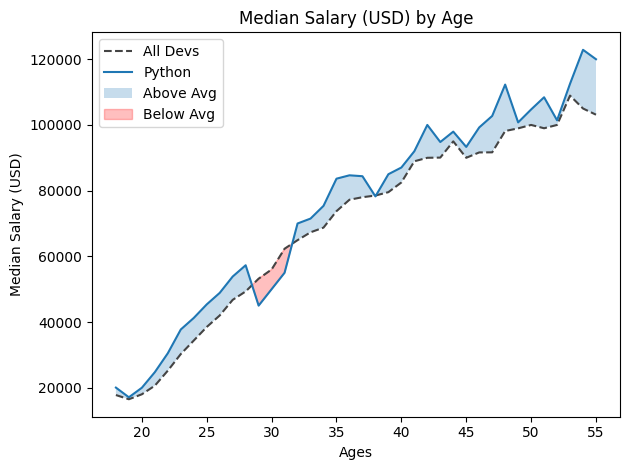

In [5]:
plt.plot(engineer_salaries['Age'], engineer_salaries['All_Devs'], color='#444444',
         linestyle='--', label='All Devs')

plt.plot(engineer_salaries['Age'], engineer_salaries['Python'], label='Python')

overall_median = engineer_salaries['All_Devs'].median()

plt.fill_between(engineer_salaries['Age'], engineer_salaries['Python'], engineer_salaries['All_Devs'],
                 where=(engineer_salaries['Python'] > engineer_salaries['All_Devs']),
                 interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(engineer_salaries['Age'], engineer_salaries['Python'], engineer_salaries['All_Devs'],
                 where=(engineer_salaries['Python'] <= engineer_salaries['All_Devs']),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()